### Image Feature Detection attempt.
The code is based on this [tutorial](https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/).

I took all the imports from the tutorial and from the Image Processing Class by Ting.\
Will filter out later whatever is not used.

In [5]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import imutils
from imutils import contours
import skimage.io as sio
from skimage import measure
from skimage.measure import label


ModuleNotFoundError: No module named 'imutils'

In [ ]:
# Unused inputs (from Ting's Image Processign Lecture):

# import pandas as pd
# import os
# import argparse
# from scipy.ndimage.morphology import binary_fill_holes
# import skimage
# import skimage.util as skt
# from skimage import data # this us built-in images data set
# from skimage.color import rgb2hsv # convert RGB to hue saturation intensity - another way of representing colors
# from skimage.exposure import histogram
# from skimage.feature import canny
# from skimage.filters import rank
# from skimage.filters import gaussian
# from skimage.filters import sobel, prewitt, scharr
# from skimage.measure import regionprops
# from skimage.morphology import disk
# from skimage.morphology import square, star
# from skimage.morphology import remove_small_objects
# from skimage.transform import rescale # to compress the image

In [ ]:
image = cv2.imread('/Users/elenashoushpanova/Desktop/Cubic_8_FFT.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]

In [ ]:
sio.imshow(gray)

In [ ]:
sio.imshow(blurred)

In [ ]:
sio.imshow(thresh)

In [ ]:
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

In [ ]:
sio.imshow(thresh)

In [ ]:
## perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=4, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 25:
        mask = cv2.add(mask, labelMask)

In [ ]:
sio.imshow(mask)

In [ ]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    #cv2.circle(image, (int(cX), int(cY)), int(radius), (0, 0, 255), 3)  # Circle
    cv2.circle(image, (int(cX), int(cY)), 2, (0, 0, 255), 3)  # Center of the circle
    cv2.putText(image, "#{}".format(i + 1), (x-40, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    cv2.putText(image, "{}".format((int(cX), int(cY))), (x-15, y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    point = [int(cX), int(cY)]
# show the output image
sio.imshow(image)
#cv2.waitKey(0)

## This is the result function:

In [2]:
def identify_fft_dots(image_path):
    """
    This function identifies the dots that represent planes on the FFT image.
    Input is a file path to the image.
    Output is a list of coordinates of dots.
    """

    # Load image. cv2 alwys loads as [r,g,b] for each pixel.
    image = cv2.imread(image_path)
    # Convert to grey format:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Remove noise:
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)
    # Apply filters:
    thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=4)
    
    # Perform a connected component analysis on the thresholded
    # image, then initialize a mask to store only the "large"
    # components - in other words find "fat dots":
    labels = measure.label(thresh, neighbors=4, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    # loop over the unique components
    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 25:
            mask = cv2.add(mask, labelMask)
    
    # Find the contours in the mask, then sort them from left to
    # right - this is to lable "fat dots":
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts)[0]
    # loop over the contours
    points = []
    for (i, c) in enumerate(cnts):
        # draw the bright spot on the image
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        #cv2.circle(image, (int(cX), int(cY)), int(radius), (0, 0, 255), 3)  # Circle
        cv2.circle(image, (int(cX), int(cY)), 2, (0, 0, 255), 3)  # Center of the circle
        cv2.putText(image, "#{}".format(i + 1), (int(cX), int(cY) - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        #cv2.putText(image, "{}".format((int(cX), int(cY))), (x-15, y-15),
         #           cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 0), 2)
        point = [int(cX), int(cY)]
        points.append([i+1, point])
    # show the output image
    sio.imshow(image)
    #cv2.waitKey(0)
    return points

[[1, [100, 144]],
 [2, [116, 232]],
 [3, [130, 314]],
 [4, [202, 215]],
 [5, [189, 131]],
 [6, [214, 298]],
 [7, [274, 116]],
 [8, [287, 197]],
 [9, [303, 285]]]

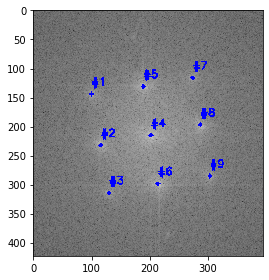

In [3]:
image_path = '/Users/elenashoushpanova/Desktop/Cubic_8_FFT.png'
identify_fft_dots(image_path)